In [1]:
import glob
import pandas
import numpy

dataset_files = (('MNIST', glob.glob('mnist-data/*.csv')), ('CIFAR-10', glob.glob('cifar-data/*.csv')))
df = pandas.DataFrame()
for dataset, dataset_files in dataset_files:
    for csv_file in dataset_files:
        csv_dataframe = pandas.read_csv(csv_file, converters={"Miss Rate": lambda percentage: float(percentage.rstrip('%'))/100 if percentage else None})
        extracted_data = csv_dataframe[["Miss Rate", "Data Loading Time (s)"]].dropna()
        extracted_data['Dataset'] = dataset
        df = df.append(extracted_data)

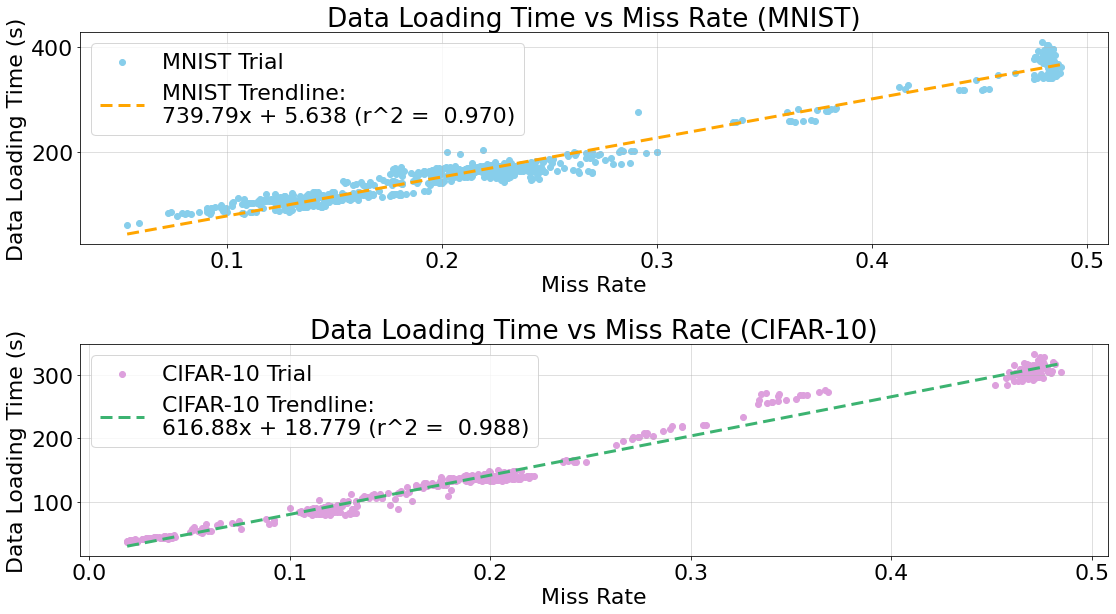

In [2]:
from matplotlib import pyplot as plt

DOT_COLORS = {'MNIST': 'skyblue', 'CIFAR-10': 'plum'}
LINE_COLORS = {'MNIST': 'orange', 'CIFAR-10': 'mediumseagreen'}

plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 22})

unique_datasets = df["Dataset"].unique()
for i, dataset in enumerate(unique_datasets, 1):
    plt.subplot(len(unique_datasets), 1, i)
    data = df.loc[df["Dataset"] == dataset]
    x, y = data["Miss Rate"], data["Data Loading Time (s)"]
    plt.scatter(x, y, color=DOT_COLORS[dataset], label=f"{dataset} Trial")

    correlation_matrix = numpy.corrcoef(x, y)
    r2 = correlation_matrix[0, 1]**2
    linear_terms = numpy.polyfit(x, y, 1)
    trendline_func = numpy.poly1d(linear_terms)

    plt.ylabel("Data Loading Time (s)")
    plt.xlabel("Miss Rate")
    plt.title(f"Data Loading Time vs Miss Rate ({dataset})")
    
    trendline_x = numpy.linspace(min(x), max(x), 1000)
    plt.plot(
        trendline_x,
        trendline_func(trendline_x),
        label=f"{dataset} Trendline: \n{linear_terms[0] :0.2f}x + {linear_terms[1] :0.3f} (r^2 = {r2: 0.3f})",
        color=LINE_COLORS[dataset],
        linestyle='dotted',
        dashes=[4, 2],
        linewidth=3,
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1, 0]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.grid(axis='both', alpha=0.5)

    
plt.subplot(2, 1, 1)
plt.tight_layout()

# plt.savefig("scatterplot.png", dpi=300)
plt.show()